# Regression Models

In [1]:
# before any feature engineering

In [34]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import xgboost as xgb

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import datetime as dt 
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [11]:
# load data 
path = '/Users/reneehall/Documents/Learning/lighthouse_labs/coursework-lighthouse-labs/Mid-term project/colab_data/'
fl_df = pd.read_csv(path+'cleaned_balanced_sample.csv')

# drop unneeded columns and misleading columns like dep_delay
to_drop = ['dep_delay', 'cancelled', 'dep_time', 'arr_time', 'actual_elapsed_time']
fl_df = fl_df.drop(labels=to_drop, axis=1)

In [14]:
# before regression, need to transform categorical into continuous

# date string to unix
fl_df['fl_date'] = pd.to_datetime(fl_df['fl_date'])
fl_df['timestamp'] = fl_df['fl_date'].map(dt.datetime.toordinal)
fl_df = fl_df.drop(labels=['fl_date'], axis=1)

# encode categorical vars using Label Encoder <-- can try onehot label encoding later
label_encoder = preprocessing.LabelEncoder()

cat_vars = fl_df.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    fl_df[col] = label_encoder.fit_transform(fl_df[col])

In [15]:
# separate x and y
X = fl_df.drop(labels='arr_delay', axis=1)
y = fl_df['arr_delay']

## Linear Regression

### Baseline

In [16]:
# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

# predict using linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

In [17]:
# evaluate using MAE
MAE = mean_absolute_error(y_test, y_lr)
print(f"MAE: {MAE}")

# evaluate using R2
R2 = r2_score(y_test, y_lr)
print(f"R2: {R2}")

# evaluate with adjusted R2
adj_R2 = 1 - ((1 - R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"adj_R2: {adj_R2}")

# calculate MAPE
MAPE = mean_absolute_percentage_error(y_test,y_lr)
print(f"MAPE: {MAPE}")

MAE: 29.817678738223833
R2: 0.00015289973331789053
adj_R2: 1.4012018944242755e-05
MAPE: 885213409284154.8


In [18]:
# Try with scaled X

In [19]:
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)

In [20]:
# make train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

# predict using linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

In [21]:
# evaluate using MAE
MAE = mean_absolute_error(y_test, y_lr)
print(f"MAE: {MAE}")

# evaluate using R2
R2 = r2_score(y_test, y_lr)
print(f"R2: {R2}")

# evaluate with adjusted R2
adj_R2 = 1 - ((1 - R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"adj_R2: {adj_R2}")

# calculate MAPE
MAPE = mean_absolute_percentage_error(y_test,y_lr)
print(f"MAPE: {MAPE}")

MAE: 29.817678738223833
R2: 0.00015289973331789053
adj_R2: 1.4012018944242755e-05
MAPE: 885213409284154.8


## Lasso Regression

### Baseline

In [22]:
# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

# predict using lasso regression
lr = Lasso()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

In [23]:
# evaluate using MAE
MAE = mean_absolute_error(y_test, y_lr)
print(f"MAE: {MAE}")

# evaluate using R2
R2 = r2_score(y_test, y_lr)
print(f"R2: {R2}")

# evaluate with adjusted R2
adj_R2 = 1 - ((1 - R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"adj_R2: {adj_R2}")

# calculate MAPE
MAPE = mean_absolute_percentage_error(y_test,y_lr)
print(f"MAPE: {MAPE}")

MAE: 29.81815195813961
R2: 0.0001568193562977438
adj_R2: 1.7932186394897798e-05
MAPE: 885523145815035.9


In [24]:
# try with scaled X

In [25]:
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

lr = Lasso()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

In [26]:
# evaluate using MAE
MAE = mean_absolute_error(y_test, y_lr)
print(f"MAE: {MAE}")

# evaluate using R2
R2 = r2_score(y_test, y_lr)
print(f"R2: {R2}")

# evaluate with adjusted R2
adj_R2 = 1 - ((1 - R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"adj_R2: {adj_R2}")

# calculate MAPE
MAPE = mean_absolute_percentage_error(y_test,y_lr)
print(f"MAPE: {MAPE}")

MAE: 29.81815195813961
R2: 0.0001568193562977438
adj_R2: 1.7932186394897798e-05
MAPE: 885523145815035.9


## Ridge Regression

### Baseline

In [27]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

# create ridge regression model
lr = Ridge()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

In [28]:
# evaluate using MAE
MAE = mean_absolute_error(y_test, y_lr)
print(f"MAE: {MAE}")

# evaluate using R2
R2 = r2_score(y_test, y_lr)
print(f"R2: {R2}")

# evaluate with adjusted R2
adj_R2 = 1 - ((1 - R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"adj_R2: {adj_R2}")

# calculate MAPE
MAPE = mean_absolute_percentage_error(y_test,y_lr)
print(f"MAPE: {MAPE}")

MAE: 29.81767874334376
R2: 0.0001528996758524137
adj_R2: 1.4011961470994372e-05
MAPE: 885213410746352.1


In [ ]:
# try scaling X

In [29]:
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

lr = Ridge()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

In [30]:
# evaluate using MAE
MAE = mean_absolute_error(y_test, y_lr)
print(f"MAE: {MAE}")

# evaluate using R2
R2 = r2_score(y_test, y_lr)
print(f"R2: {R2}")

# evaluate with adjusted R2
adj_R2 = 1 - ((1 - R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"adj_R2: {adj_R2}")

# calculate MAPE
MAPE = mean_absolute_percentage_error(y_test,y_lr)
print(f"MAPE: {MAPE}")

MAE: 29.81767874334376
R2: 0.0001528996758524137
adj_R2: 1.4011961470994372e-05
MAPE: 885213410746352.1


## XGBoost Regressor

### Baseline

In [32]:
# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)
y_xg = xg.predict(X_test)

In [33]:
# evaluate using MAE
MAE = mean_absolute_error(y_test, y_xg)
print(f"MAE: {MAE}")

# evaluate using R2
R2 = r2_score(y_test, y_xg)
print(f"R2: {R2}")

# evaluate with adjusted R2
adj_R2 = 1 - ((1 - R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"adj_R2: {adj_R2}")

# calculate MAPE
MAPE = mean_absolute_percentage_error(y_test,y_xg)
print(f"MAPE: {MAPE}")

MAE: 29.762299529116103
R2: -0.004359038002367033
adj_R2: -0.004498552465289851
MAPE: 877568639922971.1


In [ ]:
# with scaled X

In [36]:
scaler = StandardScaler()
Xsc = scaler.fit_transform(X)

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

lr = xgb.XGBRegressor()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

In [37]:
# evaluate using MAE
MAE = mean_absolute_error(y_test, y_lr)
print(f"MAE: {MAE}")

# evaluate using R2
R2 = r2_score(y_test, y_lr)
print(f"R2: {R2}")

# evaluate with adjusted R2
adj_R2 = 1 - ((1 - R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"adj_R2: {adj_R2}")

# calculate MAPE
MAPE = mean_absolute_percentage_error(y_test,y_lr)
print(f"MAPE: {MAPE}")

MAE: 29.762299529116103
R2: -0.004359038002367033
adj_R2: -0.004498552465289851
MAPE: 877568639922971.1


## Conclusions after trying a few baseline models

None of these results are really that great...
<br>
Will try checking feature importance, removing a few features, see if results improves

### XGBR Feature Importance

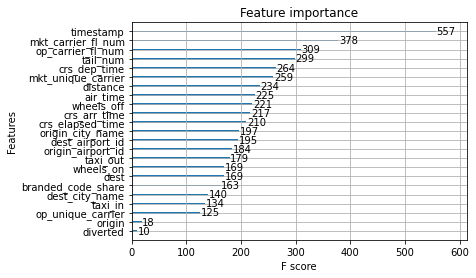

In [35]:
# from non-scaled xgboost baseline model
xgb.plot_importance(xg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

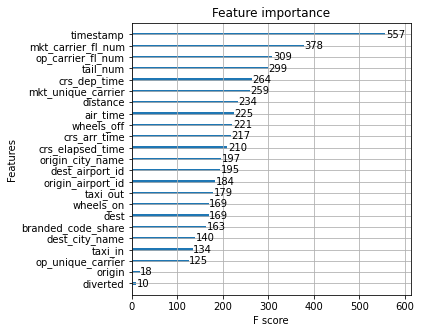

In [38]:
# from scaled xgboost baseline model
xgb.plot_importance(xg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [40]:
# remove some of the less important features
to_drop = ['diverted', 'origin','op_unique_carrier','taxi_in','dest_city_name','branded_code_share','dest','wheels_on','taxi_out']
fl_df.drop(labels=to_drop, axis=1, inplace=True)

In [44]:
X = fl_df.drop(labels='arr_delay', axis=1)
y = fl_df['arr_delay']

## Try XGBoost Regression with reduced features

In [45]:
# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)
y_xg = xg.predict(X_test)

In [46]:
# evaluate using MAE
MAE = mean_absolute_error(y_test, y_xg)
print(f"MAE: {MAE}")

# evaluate using R2
R2 = r2_score(y_test, y_xg)
print(f"R2: {R2}")

# evaluate with adjusted R2
adj_R2 = 1 - ((1 - R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"adj_R2: {adj_R2}")

# calculate MAPE
MAPE = mean_absolute_percentage_error(y_test,y_xg)
print(f"MAPE: {MAPE}")

MAE: 29.718264992433642
R2: -0.0017572535128838052
adj_R2: -0.0018463070126932823
MAPE: 871809157175399.0


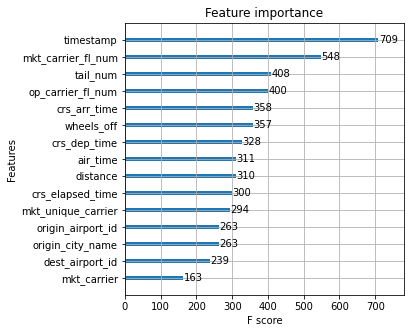

In [47]:
# check feature importance
xgb.plot_importance(xg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

## Bring in some engineered features, see if it helps

In [59]:
# smaller sample size for quicker modelling, and with engineered features
fl_df = pd.read_csv(path+'mini_sample.csv')

# drop unneeded columns and misleading columns like dep_delay, and a few columns I forgot to drop when creating features
to_drop = ['dep_delay', 'cancelled', 'dep_time', 'arr_time', 'actual_elapsed_time', 'diverted', 'percent_delay_dep_x', 'percent_delay_dep_y','dist_group_delay_ratio.1']
fl_df = fl_df.drop(labels=to_drop, axis=1)

In [60]:
# encode categorical vars using Label Encoder <-- can try onehot label encoding later
label_encoder = preprocessing.LabelEncoder()

cat_vars = fl_df.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    fl_df[col] = label_encoder.fit_transform(fl_df[col])

In [61]:
X = fl_df.drop(labels='arr_delay', axis=1)
y = fl_df['arr_delay']

In [62]:
# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)
y_xg = xg.predict(X_test)

In [63]:
# evaluate using MAE
MAE = mean_absolute_error(y_test, y_xg)
print(f"MAE: {MAE}")

# evaluate using R2
R2 = r2_score(y_test, y_xg)
print(f"R2: {R2}")

# evaluate with adjusted R2
adj_R2 = 1 - ((1 - R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"adj_R2: {adj_R2}")

# calculate MAPE
MAPE = mean_absolute_percentage_error(y_test,y_xg)
print(f"MAPE: {MAPE}")

MAE: 31.813599931355814
R2: -0.08136411969944723
adj_R2: -0.08527135706738087
MAPE: 871275714715917.0


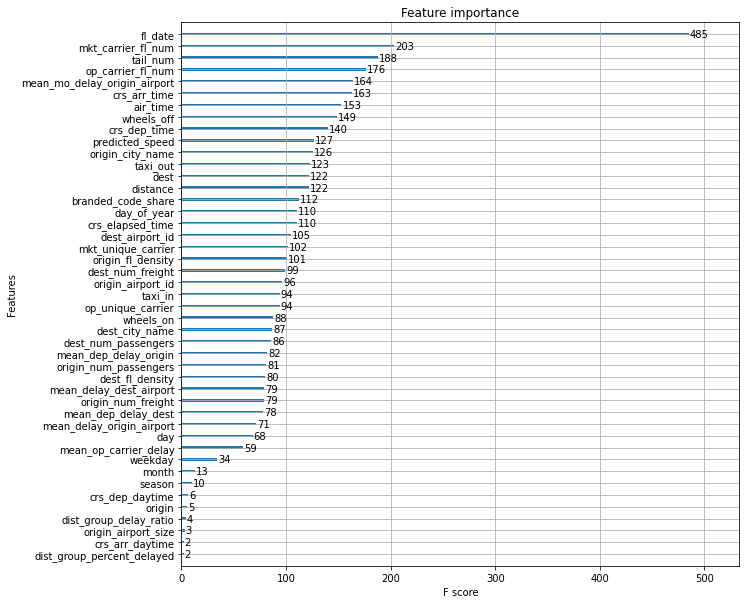

In [69]:
# check feature importance
xgb.plot_importance(xg)
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

#### Remove less important features

In [70]:
to_drop = ['dist_group_percent_delayed', 'crs_arr_daytime','origin_airport_size','dist_group_delay_ratio','origin','crs_dep_daytime','season','month','weekday','mean_op_carrier_delay']
fl_df.drop(labels=to_drop, axis=1, inplace=True)

In [71]:
X = fl_df.drop(labels='arr_delay', axis=1)
y = fl_df['arr_delay']

In [72]:
# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)
y_xg = xg.predict(X_test)

In [73]:
# evaluate using MAE
MAE = mean_absolute_error(y_test, y_xg)
print(f"MAE: {MAE}")

# evaluate using R2
R2 = r2_score(y_test, y_xg)
print(f"R2: {R2}")

# evaluate with adjusted R2
adj_R2 = 1 - ((1 - R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"adj_R2: {adj_R2}")

# calculate MAPE
MAPE = mean_absolute_percentage_error(y_test,y_xg)
print(f"MAPE: {MAPE}")

MAE: 32.18560462549726
R2: -0.0985782160352846
adj_R2: -0.10181040871368996
MAPE: 948629136591694.8


### Changing Direction

The regression results are still quite bad. When we investigate the target variable behavior we realize why.
<br>
This looks more like a time series problem. 
<br>
We decide to see if we can create a classifier for delay/no delay first, then once delay is predicted use regrssor to predict delay length.

In [74]:
path = '/Users/reneehall/Documents/Learning/lighthouse_labs/coursework-lighthouse-labs/Mid-term project/colab_data/'
fl_df = pd.read_csv(path+'cleaned_flights_sample.csv')

In [75]:
y = fl_df.sort_values(by='fl_date').arr_delay.values

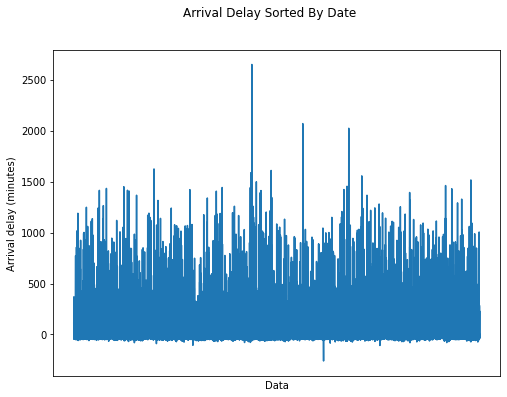

In [77]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6))
plt.ylabel('Arrival delay (minutes)')
plt.xlabel('Data')
plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False) 
plt.suptitle('Arrival Delay Sorted By Date')
plt.plot(y)
plt.show()